# Bond with Embedded Calls and Put Options

Value a bond with embedded optionality using the Hull-White and Black-Karasinski model

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [12]:
from financepy.finutils import *
from financepy.products.bonds import *
from financepy.market.curves.TuringDiscountCurve import TuringDiscountCurve
from financepy.products.rates import *
from financepy.models.FinModelRatesHW import FinModelRatesHW
from financepy.models.TuringModelRatesBK import TuringModelRatesBK

## Example from Matlab

https://fr.mathworks.com/help/fininst/optembndbyhw.html#bviuizn-1_sep_optembndbyhw_example1

In [13]:
valuationDate = TuringDate(1, 1, 2007)
settlementDate = valuationDate

### Set up discount curve

In [18]:
dcType = TuringDayCountTypes.ACT_360
fixedFreq = TuringFrequencyTypes.SEMI_ANNUAL
swapType = TuringSwapTypes.PAY
swap1 = FinIborSwap(settlementDate, TuringDate(1,1,2008), swapType, 0.05, fixedFreq, dcType)
swap2 = FinIborSwap(settlementDate, TuringDate(1,1,2009), swapType, 0.05, fixedFreq, dcType)
swap3 = FinIborSwap(settlementDate, TuringDate(1,1,2010), swapType, 0.05, fixedFreq, dcType)
swaps = [swap1, swap2, swap3]
discountCurve = TuringIborSingleCurve(valuationDate, [], [], swaps)

### Set up the Puttable Bond

First create a bond that we will use as a reference

In [19]:
issueDate = TuringDate(1,1, 2000)
maturityDate = TuringDate(1, 1, 2010)
coupon = 0.05
frequencyType = TuringFrequencyTypes.ANNUAL
accrualType = TuringDayCountTypes.ACT_ACT_ICMA

In [20]:
bond = TuringBond(issueDate, maturityDate, coupon, frequencyType, accrualType)

In [21]:
v = bond.cleanPriceFromDiscountCurve(settlementDate, discountCurve)

In [22]:
print("Pure Bond Price:", v)

Pure Bond Price: 99.62398708897757


Now specify the put and call dates

In [13]:
callDates = []
callPrices = []
putDates = [TuringDate(1, 1, 2008), TuringDate(1, 1, 2009), TuringDate(1, 1, 2010)]
putPrices = [100.0, 100.0, 100.0]

Now create the TuringBondEmbeddedOption

In [15]:
puttableBond = TuringBondEmbeddedOption(issueDate, maturityDate, coupon, frequencyType, accrualType,
                                     callDates, callPrices, putDates, putPrices)

### The Hull-White Model

In [16]:
sigma = 0.01  # basis point volatility
a = 0.1
numTimeSteps = 200

In [17]:
model = FinModelRatesHW(sigma, a, numTimeSteps)

In [18]:
v = puttableBond.value(settlementDate, discountCurve, model)

In [19]:
print(v)

{'bondwithoption': 100.47863484272936, 'bondpure': 99.62398708897754}


### Convergence Testing

In [20]:
timeSteps = range(20,220,1)
values = []
for numTimeSteps in timeSteps:
    model = FinModelRatesHW(sigma, a, numTimeSteps)
    v = puttableBond.value(settlementDate, discountCurve, model)
    values.append(v['bondwithoption'])

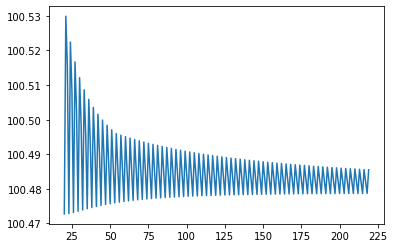

In [21]:
plt.plot(timeSteps, values)

Copyright (c) 2020 Dominic O'Kane